# Aim
To predict the price of a used car from a given dataset by
- Extracting the relavant numerical and categorical features from the given data.
- Modelling their relationships with the price of a car.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)

In [3]:
df.isnull()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df.iloc[:,range(10)]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630
...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256


In [6]:
df.iloc[:,range(10,20)]

,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio
0,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0
1,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0
2,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0
3,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0
4,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0
...,...,...,...,...,...,...,...,...,...,...
196,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5
197,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7
198,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8
199,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0


In [7]:
df.iloc[:,range(20,29)]

,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...
196,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


# Feature Extraction

In [8]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [9]:
df.corr().loc['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

## Relevant Categorical Variables

In [10]:
categ1 = ['num-of-doors', 'body-style', 'drive-wheels', 'engine-location']
categ2 = ['aspiration','engine-type','num-of-cylinders','fuel-system']

In [11]:
categ = categ1 + categ2
for colname in categ:
    print(df[colname].value_counts())

four    115
two      86
Name: num-of-doors, dtype: int64
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
front    198
rear       3
Name: engine-location, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64
four      157
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64


In [12]:
categ1 = np.array(categ1).reshape(2,2)

In [13]:
categ2=np.array(categ2).reshape(2,2)

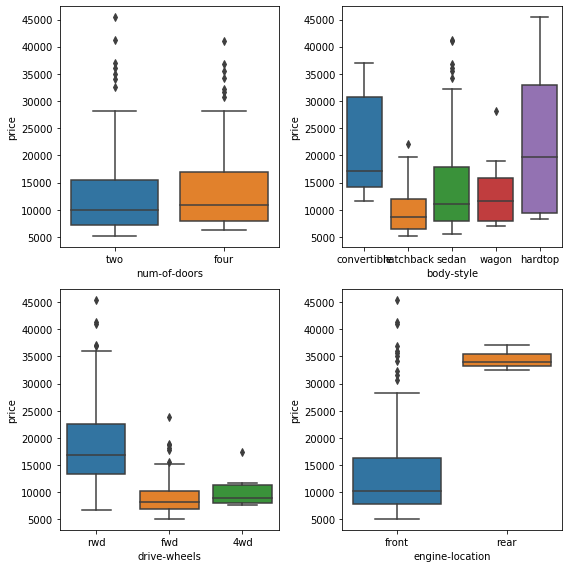

In [14]:
figure,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
for i in range(2):
    for j in range(2):
        sns.boxplot(x=categ1[i][j],y='price',data=df,ax=axes[i][j])
plt.tight_layout()

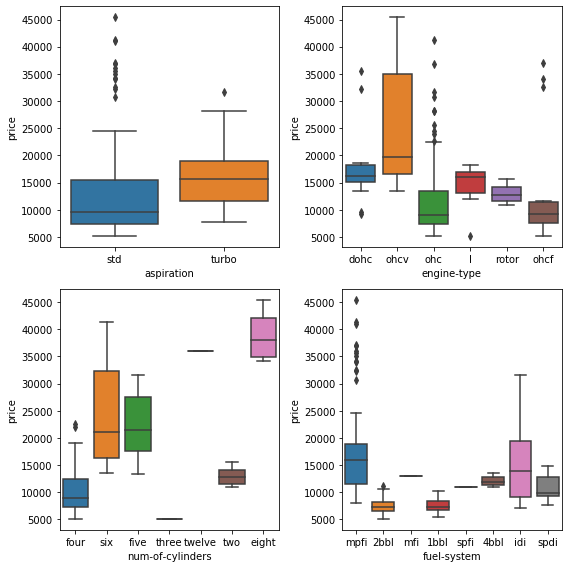

In [15]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
for i in range(2):
    for j in range(2):
        sns.boxplot(x=categ2[i][j],y='price',data=df,ax=axes[i][j])
plt.tight_layout()

In [16]:
#num of doors - no real price difference
#num of cylinders, engine-type, aspiration, engine-location - signinficantly skewed data
#only drive-wheels, body-style and fuel-system remains

In [17]:
df_g3 = df[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index=False).mean()
df_pivot = df_g3.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

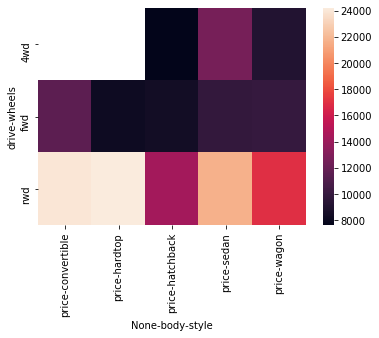

In [18]:
sns.heatmap(df_pivot)

In [19]:
df_g4 = df[['drive-wheels','fuel-system','price']].groupby(['drive-wheels','fuel-system'],as_index=False).mean()
df_g4 = df_g4[(df_g4['fuel-system']=='mpfi') | (df_g4['fuel-system']=='2bbl')] #Other fuels systems are very few in number
df_pivot2 = df_g4.pivot(index='drive-wheels',columns='fuel-system')
df_pivot2

price              
fuel-system          2bbl          mpfi
drive-wheels                           
4wd           8305.000000  13467.666667
fwd           7341.410714  12550.060606
rwd           7693.666667  20805.678571

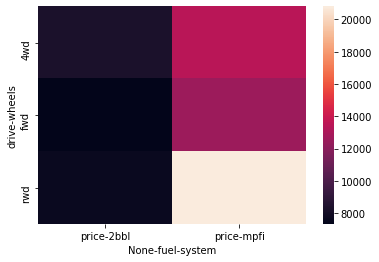

In [20]:
sns.heatmap(df_pivot2)

In [21]:
from scipy import stats

### Testing if there is a significant difference between the prices of the different drive-wheel categories

In [22]:
g_test = df[['drive-wheels','price']].groupby('drive-wheels')

##### All of them together

In [23]:
f_val, p_val = stats.f_oneway(g_test.get_group('fwd')['price'],g_test.get_group('rwd')['price'],g_test.get_group('4wd')['price'])
print('fwd vs rwd vs 4wd')
print("The f score is",f_val,"and the p value is",p_val)

fwd vs rwd vs 4wd
The f score is 67.95406500780399 and the p value is 3.3945443577151245e-23


##### 4wd and rwd

In [24]:
f_val,p_val = stats.f_oneway(g_test.get_group('4wd')['price'],g_test.get_group('rwd')['price'])
print('4wd vs rwd')
print("The f score is",f_val,"and the p value is",p_val)

4wd vs rwd
The f score is 8.580681368924756 and the p value is 0.004411492211225333


##### fwd and 4wd

In [25]:
f_val,p_val = stats.f_oneway(g_test.get_group('fwd')['price'],g_test.get_group('4wd')['price'])
print('fwd vs 4wd')
print("The f score is",f_val,"and the p value is",p_val)

fwd vs 4wd
The f score is 0.6654657502523033 and the p value is 0.41620116697845666


##### rwd and fwd

In [26]:
f_val,p_val = stats.f_oneway(g_test.get_group('rwd')['price'],g_test.get_group('fwd')['price'])
print('rwd vs fwd')
print("The f score is",f_val,"and the p value is",p_val)

rwd vs fwd
The f score is 130.55331609591104 and the p value is 2.235530635567824e-23


### Testing if there is a significant difference between the prices of the different fuel-system categories

In [27]:
g_test2 = df[['fuel-system','price']][(df['fuel-system']=='mpfi') | (df['fuel-system']=='2bbl')].groupby(df['fuel-system'])
f_val,p_val = stats.f_oneway(g_test2.get_group('mpfi')['price'],g_test2.get_group('2bbl')['price'])
print("The f score is",f_val,"and the p value is",p_val)

The f score is 86.55178928944206 and the p value is 1.290189545502851e-16


## Relevant Numerical Variables

In [28]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Exploring the relationships

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


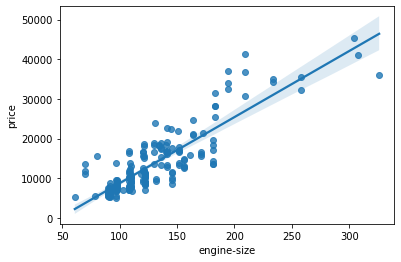

In [29]:
print(df[['engine-size','price']].corr())
sns.regplot(x='engine-size',y='price',data=df)

             highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000


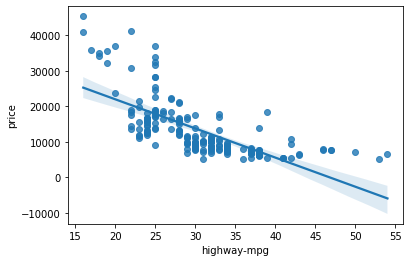

In [30]:
print(df[['highway-mpg','price']].corr())
sns.regplot(x='highway-mpg',y='price',data=df)

         stroke    price
stroke  1.00000  0.08231
price   0.08231  1.00000


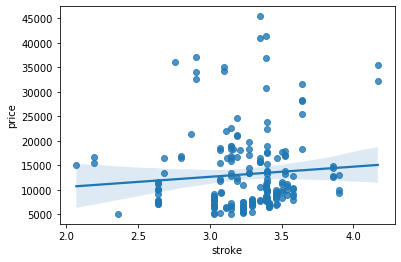

In [31]:
print(df[['stroke','price']].corr())
sns.regplot(x='stroke',y='price',data=df)

In [32]:
continuous = ['wheel-base','horsepower','length','width','curb-weight','engine-size','bore','city-mpg','highway-mpg']

In [33]:
for colname in continuous:
    pearson_coeff, p_val = stats.pearsonr(df[colname],df['price'])
    print (colname,":", pearson_coeff,"and",p_val)

wheel-base : 0.5846418222655081 and 8.076488270732989e-20
horsepower : 0.809574567003656 and 6.369057428259557e-48
length : 0.690628380448364 and 8.016477466158986e-30
width : 0.7512653440522674 and 9.200335510481516e-38
curb-weight : 0.8344145257702846 and 2.1895772388936914e-53
engine-size : 0.8723351674455185 and 9.265491622198389e-64
bore : 0.5431553832626602 and 8.049189483935489e-17
city-mpg : -0.6865710067844677 and 2.321132065567674e-29
highway-mpg : -0.7046922650589529 and 1.7495471144477352e-31


##### Therefore all of these are significant


In [34]:
df.to_csv('automobile.csv',index=False)

In [35]:
from sklearn.linear_model import LinearRegression

### SImple linear regression with each of the columns individually

In [36]:
slr_price = {}
for colname in continuous:
    lm = LinearRegression()
    lm.fit(df[[colname]],df['price']) #The x input has to be a dataframe
    slr_price[colname] = [lm.intercept_,lm.coef_[0],]
print('Intercept followed by Slope')
slr_price

Intercept followed by Slope


{'wheel-base': [-62460.81986606929, 765.8930715311521],
 'horsepower': [-4597.558297892912, 172.18312191270797],
 'length': [-64384.436327421616, 92690.65779927756],
 'width': [-173986.08728233713, 204554.63587592467],
 'curb-weight': [-19553.570636227483, 12.818847002528232],
 'engine-size': [-7963.338906281049, 166.860015691416],
 'bore': [-40423.65161531275, 16101.995603334033],
 'city-mpg': [34595.600842778265, -849.4532245402949],
 'highway-mpg': [38423.305858157386, -821.7333783219252]}

### Multiple Linear Regression with all the columns together

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [59]:
 X_train, X_test, y_train, y_test = train_test_split(df[continuous],df['price'], test_size=0.33, random_state=42)
lm.fit(X_train,y_train)
mlr_price = {'intercept':lm.intercept_,'coefficients':lm.coef_}
mlr_price

{'intercept': -40485.212274168676,
 'coefficients': array([ 1.82968452e+02,  3.78097912e+01, -3.10863352e+03,  3.26599764e+04,
         6.49862160e-01,  8.29339656e+01, -1.70304070e+03, -1.71272104e+02,
         6.40818702e+01])}

In [60]:
yhat = lm.predict(X_test)
r2_score(y_test,yhat)

0.7714765573642508

##### Residual plot to check if the columns are linearly related to the price

In [40]:
cont_copy = continuous[:]
cont_copy = np.array(cont_copy).reshape(3,3)

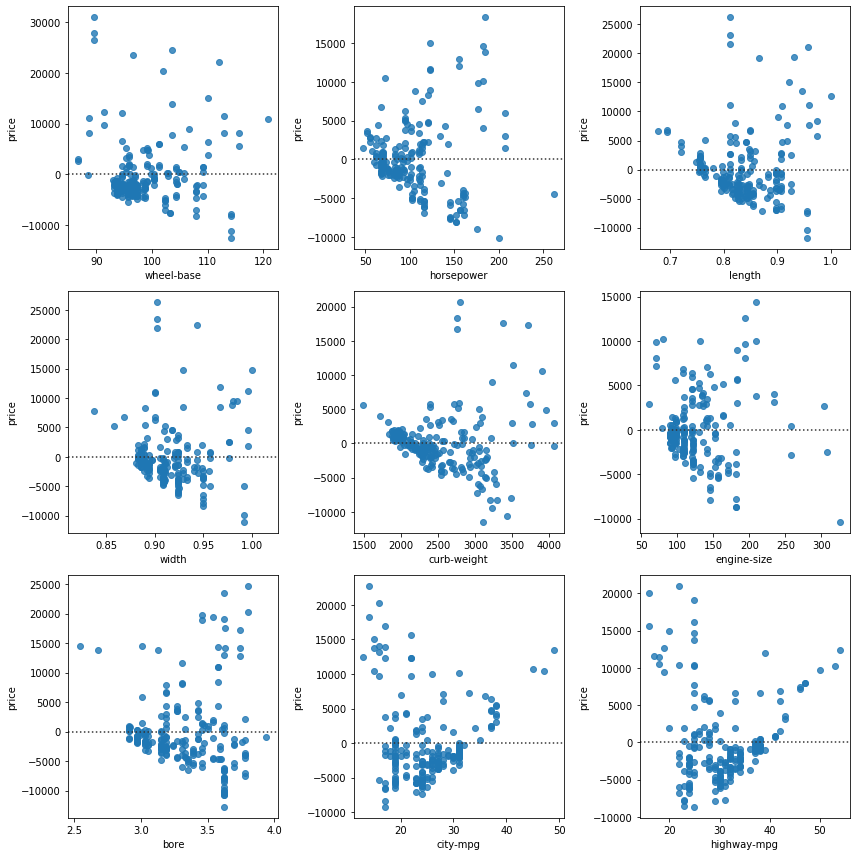

In [41]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,12))
for i in range(3):
    for j in range(3):
        sns.residplot(x=cont_copy[i][j],y='price',data = df,ax = axes[i][j])
plt.tight_layout()

Text(0.5, 1.0, 'price vs highway-mpg')

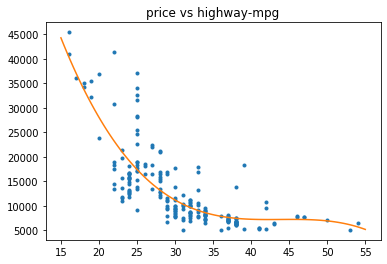

In [42]:
f = np.polyfit(df['highway-mpg'],df['price'],3)
p = np.poly1d(f)
x_new = np.linspace(15, 55, 100)
y_new = p(x_new) #array input gives array output
plt.plot(df['highway-mpg'],df['price'], '.', x_new, y_new, '-')
plt.title('price vs highway-mpg')

Text(0.5, 1.0, 'price vs city-mpg')

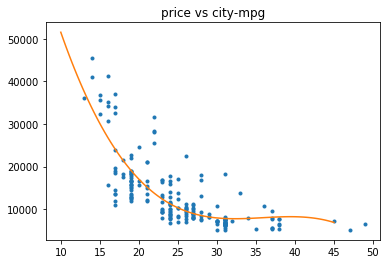

In [43]:
f = np.polyfit(df['city-mpg'],df['price'],3)
p = np.poly1d(f)
x_new = np.linspace(10, 45, 100)
y_new = p(x_new) #array input gives array output
plt.plot(df['city-mpg'],df['price'], '.', x_new, y_new, '-')
plt.title('price vs city-mpg')

### Fitting Polynomial Features

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
pr = PolynomialFeatures(3) #3rd order 

In [46]:
himpg_pr = pr.fit_transform(df[['highway-mpg']])
cimpg_pr = pr.fit_transform(df[['city-mpg']])
df_himpg = pd.DataFrame(himpg_pr)
df_cimpg = pd.DataFrame(cimpg_pr)
df_himpg.columns = 'h0 h1 h2 h3'.split()
df_cimpg.columns = 'c0 c1 c2 c3'.split()
df_mpg = pd.concat([df_himpg,df_cimpg],axis=1,sort=False)

In [61]:
lm3 = LinearRegression()
continuous2 = ['wheel-base','horsepower','length','width','curb-weight','engine-size','bore']
X = pd.concat([df[continuous2],df_mpg],axis=1,sort=False)
y = df['price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
lm3.fit(X_train,y_train)
mlr_poly = {'intercept':lm3.intercept_,'coefficients':lm3.coef_}
mlr_poly

{'intercept': 16180.929004379144,
 'coefficients': array([ 1.85148814e+01,  1.31758527e+01, -6.45923879e+03,  2.37880179e+04,
         3.79332010e+00,  7.41018381e+01,  1.20768857e+03, -3.84261511e-11,
         3.17217095e+02,  8.96202761e+00, -2.45555911e-01,  6.36646291e-12,
        -4.79513566e+03,  1.21494122e+02, -8.83794281e-01])}

In [63]:
yhat = lm3.predict(X_test)
r2_score(y_test,yhat)

0.7425386523681169

### Including Categorical Varaibles

In [67]:
dw_dummies = pd.get_dummies(df['drive-wheels'])
fs_dummies = pd.get_dummies(df['fuel-system'][(df['fuel-system']=='mpfi') | (df['fuel-system']=='2bbl')])
df_cat = pd.concat([dw_dummies,fs_dummies],axis =1)
df_cat.fillna(value=0,inplace=True)

In [68]:
X = pd.concat([X,df_cat],axis=1,sort=False)
lm4 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
lm4.fit(X_train,y_train)
mlr_poly_cat = {'intercept':lm4.intercept_,'coefficients':lm4.coef_}
mlr_poly_cat

{'intercept': -1062.0735341408217,
 'coefficients': array([-1.45671302e+01,  1.67447842e+01,  8.37678182e+03,  5.67223440e+04,
        -2.96593744e-01,  8.87115081e+01, -1.28851842e+03, -1.61799107e-09,
        -2.13733258e+03,  7.64127067e+01, -8.26890948e-01, -5.82076609e-11,
        -2.68129367e+03,  6.51470673e+01, -4.61344498e-01,  1.55676774e+02,
        -8.18656126e+02,  6.62979352e+02, -4.92868265e+02, -1.21499350e+02,
         1.55676774e+02, -8.18656126e+02,  6.62979352e+02, -4.92868265e+02,
        -1.21499350e+02])}

In [69]:
yhat = lm4.predict(X_test)
r2_score(y_test,yhat)

0.8141668718854427

#### As expected, including categorical variables and correcting for polynomial relationships gives us the best model

 Now, fitting the test data also into the model, we get

In [70]:
lm_final = LinearRegression()
lm_final.fit(X,y)
mlr_final = {'intercept':lm_final.intercept_,'coefficients':lm_final.coef_}

# Report
The best model is the one with the following features and coefficients

In [71]:
pd.DataFrame(mlr_final,index = X.columns).drop(['intercept'],axis=1)

,coefficients
wheel-base,2.286102e+01
horsepower,1.852159e+01
length,4.355960e+03
width,5.126339e+04
curb-weight,-4.088199e-01
engine-size,8.932481e+01
bore,-1.371965e+03
h0,1.146873e-09
h1,1.529343e+03
h2,-3.196675e+01
